In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Graficas
Con las definiciones previas sabemos que el conjunto de Julia esta formado por números complejos que no tienden a infinito cuando son sometidos a $n$ composiciones de una función $f_c$ en si misma, con el siguiente programa podemos ver si tiene como input un complejo $z_0$ estará en el conjunto de Julia en $c$ o no, al estar tomando un número de iteraciones relativamente grande solo hay que comparar el valor de $|f^n_{c}(z)|$ con $n$ siendo $n$ el número de iteraciones, ese sería nuestro máximo en este momento, posteriormente vamos a tener un metodo mas sofisticado de determinar el "escape" hacía infinito de cualquiera de las composiciones en cualquier $z_0$.

En el input por favor ingrese un número complejo de la forma $\mathbf{x+yj}$, si lo ingresa con $\mathbf{x+yi}$ o como pareja ordenada le dará un error por la sintaxis que maneja Python para los números complejos.

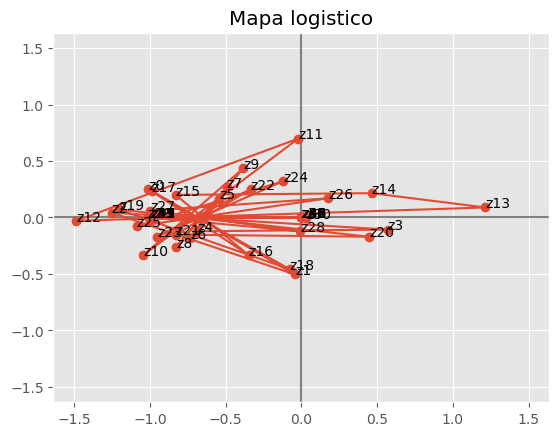

In [7]:
c = -1 + 0j
# z_0 = -1.01+0.25j
z_0 = complex(input('Ingrese un número complejo cercano a 0+0j'))
n = 50
   
def f_c(z):
    z =  z*z + c #._.
    return z

def comp(z,max_i):
    J = True
    iter = []
    iter.append(z)
    for i in range(max_i):
        z = f_c(z)
        if abs(z) <= max(abs(c),2):
            iter.append(z)
        else:
            J = False
            break

    return (iter,J)

iter = np.array(comp(z_0,n)[0])
fig, ax = plt.subplots()
x = iter.real
y = iter.imag
dis = [] 

dis.append(abs(z_0))
for i in range(1,len(iter)):
    dis.append(abs(iter[i]))

dis_max = max(dis)
zoom = 1.1
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
ax.plot(x,y,'-o',label = str(np.where(iter == x+y)))

for i in range(len(iter)):
    ax.annotate('z'+str(i), (x[i], y[i]))
    
    
plano = np.array([-dis_max,dis_max,-dis_max,dis_max])
ax.axis(zoom*plano)
plt.style.use('ggplot')
plt.grid('white')
plt.title('Mapa logistico')
plt.show()

Text(0.5, 1.0, 'Periodo de la parte real')

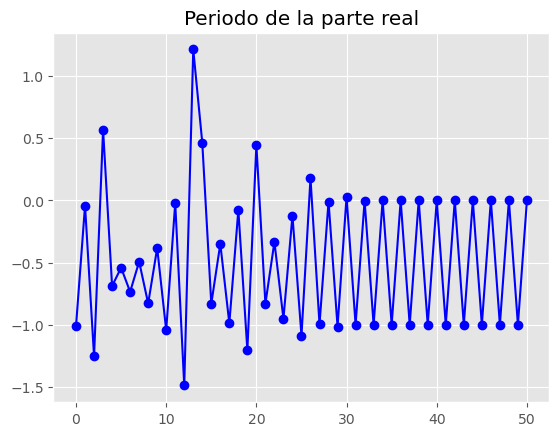

In [ ]:
real_root, ax1 = plt.subplots()
n = []
for j in range(len(iter)):
    n.append(j)

ax1.plot(n,x,'o-',color='blue')
plt.title('Periodo de la parte real')



Text(0.5, 1.0, 'Periodo de la parte compleja')

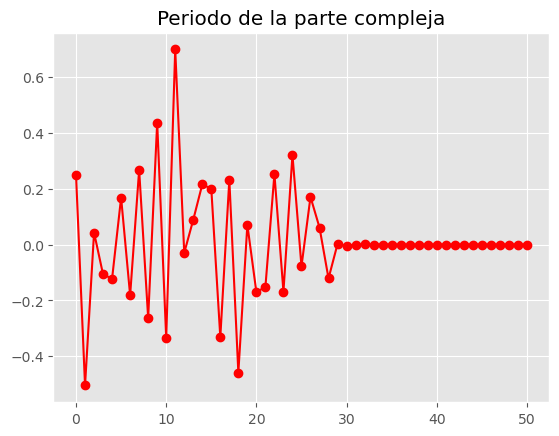

In [ ]:
comp, ax1 = plt.subplots()
ax1.plot(n,y,'o-',color='red')
plt.title('Periodo de la parte compleja')

El algoritmo para ver si un punto es o no parte del conjunto de Julia con el parametro $c$ esta basado en el algoritmo dado en el libro "Complex Dynamical System" de Robert L. Devaney, si quieren consuntarlo está en la pagina 10 del libro, más tarde demostraremos por inducción fuerte cómo es totalmente valido este algoritmo para el sistema dinamico de una función cuadratica iterada.

Ahora vamos a graficar el conjunto haciendo una matriz con el plano complejo y pasando cada uno de los puntos por nuestra iteración previamente definida, usando el criterio sabremos de que color pintar el punto, los puntos blancos no serán parte del conjunto, es decir que $|f^n(z)|\rightarrow\infty$ si $z\in J_c$

/tmp/ipykernel_5904/3272004654.py:11: RuntimeWarning: overflow encountered in multiply
  z_array = z_array*z_array + c
/tmp/ipykernel_5904/3272004654.py:11: RuntimeWarning: invalid value encountered in multiply
  z_array = z_array*z_array + c
/tmp/ipykernel_5904/3272004654.py:13: RuntimeWarning: invalid value encountered in greater
  criterio_divergentes = z_norma_array > max(2,abs(c))


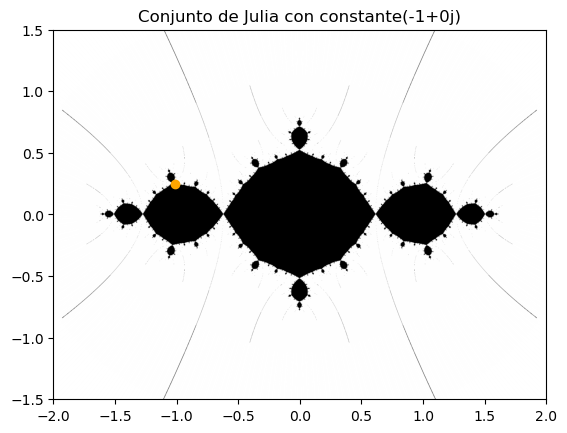

In [24]:
c = -1+0j
def julia_set(h_range, w_range, max_iterations,c):

	y, x = np.ogrid[1.5: -1.5: h_range*1j, -2: 2: w_range*1j]
	z_array = x + y*1j
	iteraciones = max_iterations + np.zeros(z_array.shape)

	no_divergentes = iteraciones > 10000
	
	for i in range(max_iterations):
		z_array = z_array*z_array + c
		z_norma_array = np.conj(z_array)
		criterio_divergentes = z_norma_array > max(2,abs(c))

		iteraciones[criterio_divergentes] = i
		
		iteraciones[no_divergentes] = 0

	return iteraciones



plt.imshow(julia_set(2000, 2000, 2000,c), cmap='binary', extent=[-2, 2, -1.5, 1.5])
plt.axis('on')
plt.title('Conjunto de Julia con constante' + str(c))
plt.plot(-1.01,0.25,'o',color='orange')
plt.show()
plt.close()

Ahora repetiremos el mismo procedimiento para el conjunto de Mandelbrot, la sucesión es distinta.

Se empieza eligiendo el $z$ y luego se ejecuta la siguiente sucesión.

$i) z_0 = 0$

$ii) z_{n+1} = z_n^2 + z$




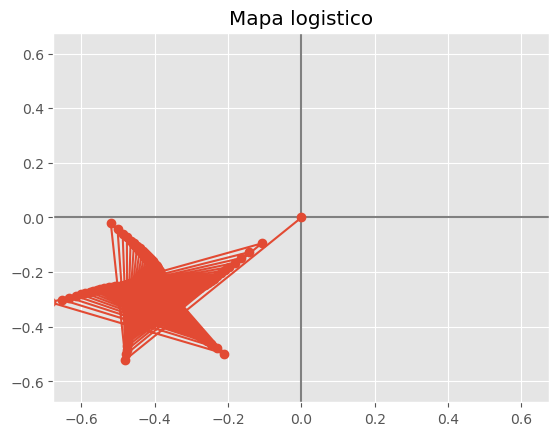

In [6]:
def sucesion_m(z,max_i):
    z_0 = 0
    iter_m = []
    iter_m.append(z_0)
    for i in range(max_i):
        z_0 = z_0*z_0 + z
        iter_m.append(z_0)
    
    return iter_m

n = complex(input('Ingrese un número complejo'))
maximo_iteraciones = 500
#-0.48-0.52j
iter = np.array(sucesion_m(n,maximo_iteraciones))
fig, ax = plt.subplots()
x = iter.real
y = iter.imag
dis = [] 

for i in range(1,len(iter)):
    dis.append(abs(iter[i]))

dis_max = max(dis)
zoom = 0.9
plt.axhline(0, color='grey')
plt.axvline(0, color='grey')
ax.plot(x,y,'-o',label = str(np.where(iter == x+y)))
    
    
plano = np.array([-dis_max,dis_max,-dis_max,dis_max])
ax.axis(zoom*plano)
plt.style.use('ggplot')
plt.grid('white')
plt.title('Mapa logistico')
plt.show()



Text(0.5, 1.0, 'Periodo de la parte real')

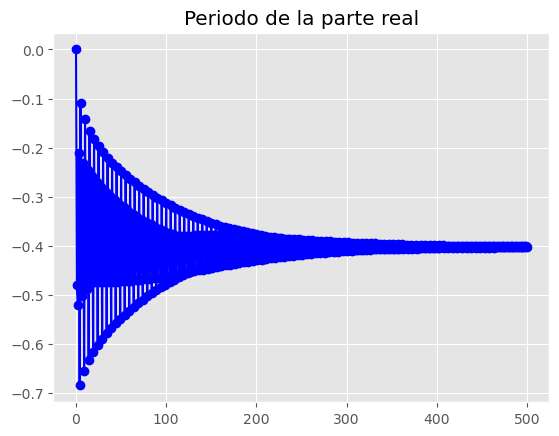

In [ ]:
real_root, ax1 = plt.subplots()
n = []
for j in range(len(iter)):
    n.append(j)

ax1.plot(n,x,'o-',color='blue')
plt.title('Periodo de la parte real')

Text(0.5, 1.0, 'Periodo de la parte compleja')

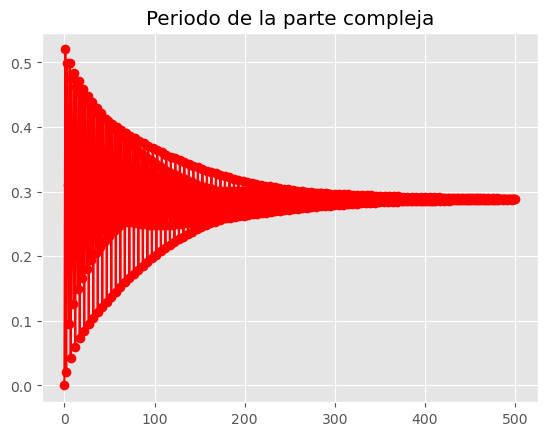

In [ ]:
comp, ax1 = plt.subplots()
ax1.plot(n,y,'o-',color='red')
plt.title('Periodo de la parte compleja')

/tmp/ipykernel_5904/2604313821.py:13: RuntimeWarning: overflow encountered in multiply
  z_array = z_array*z_array + c_array
/tmp/ipykernel_5904/2604313821.py:13: RuntimeWarning: invalid value encountered in multiply
  z_array = z_array*z_array + c_array
/tmp/ipykernel_5904/2604313821.py:15: RuntimeWarning: invalid value encountered in greater
  criterio_divergentes = z_norma_array > 2


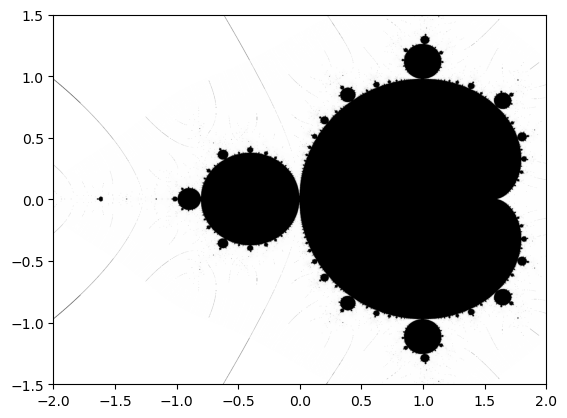

In [25]:
def mandelbrot_set(h_range, w_range, max_iterations):

    y, x = np.ogrid[1: -1: h_range*1j, -2: 0.5: w_range*1j]
    z_array = x + y*1j
    c_array = x + y*1j
    z_0 = 0 + 0j
    iteraciones = max_iterations + np.zeros(z_array.shape)
    no_divergentes = iteraciones > max_iterations
    

    for i in range(max_iterations):
    
            z_array = z_array*z_array + c_array
            z_norma_array = np.conj(z_array)
            criterio_divergentes = z_norma_array > 2

            iteraciones[criterio_divergentes] = i
    
            iteraciones[no_divergentes] = 0
            

    return iteraciones



plt.imshow(mandelbrot_set(2000, 2000, 2000), cmap='binary', extent=[-2, 2, -1.5, 1.5])
plt.axis('on')
plt.show()
plt.close()